<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live: Monday, April 19 • 8:00 - 10:00 UTC</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Recording</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.youtube.com/watch?v=w3pu0H3dXe8&t=5100s">https://www.youtube.com/watch?v=w3pu0H3dXe8&t=5100s</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Inversion settings: Inverting electrical resistivity field data

### Objectives: 
1. Load electrical resistivity field data set "data/beach.ohm"
2. Show the topography effects of the data
3. Use ERT Method Manager to invert the data

In [2]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

In [3]:
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert  # the module

We first load a sample data file, which was measured on the beach of Borkum island in the North sea.

In [4]:
data = ert.load("data/beach.ohm")
print(data)

Data: Sensors: 81 data: 1478, nonzero entries: ['a', 'b', 'i', 'm', 'n', 'r', 'u', 'valid']


The data set obviously has, besides current and potential indices, voltage and current.

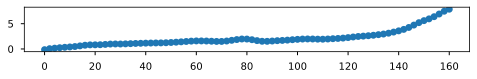

In [5]:
fig, ax = plt.subplots()
ax.plot(pg.x(data), pg.z(data), 'o-')
ax.set_aspect(2.0)

There is some topography present in the data set which affects the geometric factor.

We need a geometric factor to convert them into apparent resistivities. We use [`ert.createGeometricFactors`](https://www.pygimli.org/pygimliapi/_generated/pygimli.physics.ert.html?highlight=creategeometricfactor#pygimli.physics.ert.createGeometricFactors) which is calculated numerically, i.e. by a refined mesh with quadratic shape functions. Note that repeated calls do not cost runtime as the result is cached. 

In [6]:
data['k'] = ert.createGeometricFactors(data, numerical=True)

21/03/24 - 14:29:11 - pyGIMLi - INFO - Cache C:\Users\matthew.noteboom\.conda\envs\pg\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (8.2s x 1): C:\Users\matthew.noteboom\AppData\Roaming\pygimli\Cache\17138037726521617117


Additionally we compute an analytical geometric factor based on a flat-earth assumption. We are going to show the geometric effect, i.e. the ratio of both geometric factors (Rücker et al. 2006).

21/03/24 - 14:29:18 - pyGIMLi - INFO - Cache C:\Users\matthew.noteboom\.conda\envs\pg\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\matthew.noteboom\AppData\Roaming\pygimli\Cache\15539882257453081639


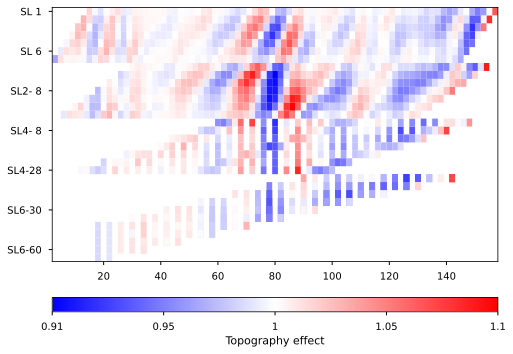

In [7]:
k0 = ert.createGeometricFactors(data)
ert.show(data, vals=k0/data['k'], label='Topography effect',
        cMap="bwr", logScale=True); #cMin=0.8, cMax=1.25, 

For the inversion, we need an error estimate, i.e. retrieved from reciprocal analysis. Errors usually consist of a relative error and an absolute error (voltage gain). Here we assume typical values of 3% and 50µV.

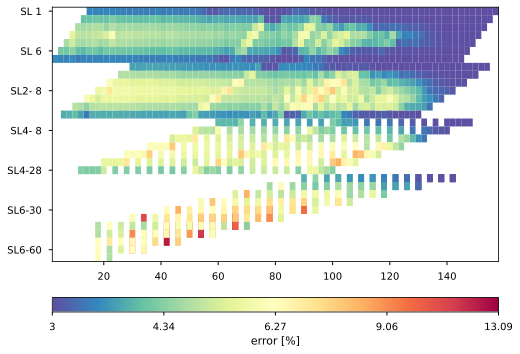

In [8]:
data['err'] = ert.estimateError(data, 
                                absoluteUError=0.00005, # 50µV
                                relativeError=0.03)  # 3%
ert.show(data, data['err']*100, label="error [%]");

In [9]:
mgr = ert.ERTManager(data)
mgr.invert(verbose=True,
           #paraDX=0.3, paraMaxCellSize=10, paraDepth=20, quality=34,
           lam=50, 
           zWeight=0.3,
          )

21/03/24 - 14:29:36 - pyGIMLi - INFO - Found 2 regions.
21/03/24 - 14:29:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/03/24 - 14:29:36 - pyGIMLi - INFO - Found 2 regions.
21/03/24 - 14:29:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/03/24 - 14:29:36 - pyGIMLi - INFO - Creating apparent resistivies from impedences rhoa = r * k
21/03/24 - 14:29:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/03/24 - 14:29:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/03/24 - 14:29:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3455 Cells: 6496 Boundaries: 5078
21/03/24 - 14:29:36 - pyGIMLi - INFO - Use median(data values)=4.107305932589179
21/03/24 - 14:29:36 - pyGIMLi - INFO - Created startmodel from forward operator: 1330, min/max=4.107306/4.107306
21/03/24 - 14:29:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000012830866720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000012830866810>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001283061FB20>
min/max (data): 1/2067
min/max (error): 3%/13.09%
min/max (start model): 4.11/4.11
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 3759.14
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  388.93 (dPhi = 89.43%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  141.06 (dPhi = 63.26%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   35.06 (dPhi = 73.64%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   10.24 (dPhi = 63.94%) lam: 5

1330 [1655.6294629586148,...,12.40135815144923]

The chi-squared fit is not quite 1 but not far away from it, so we want to have a look at the model.

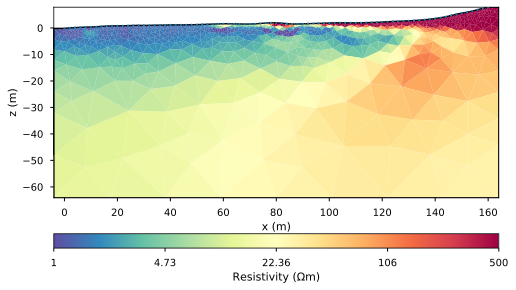

In [10]:
mgr.showResult(cMin=1, cMax=500, xlabel="x (m)", ylabel="z (m)", cMap="Spectral_r", coverage=1);

It shows high resistivities in the dune area and low resistivity (salt or brackish water) towards the beach. From the dune, freshwater is moving towards the sea. We want to have a look at the measured and modelled data.

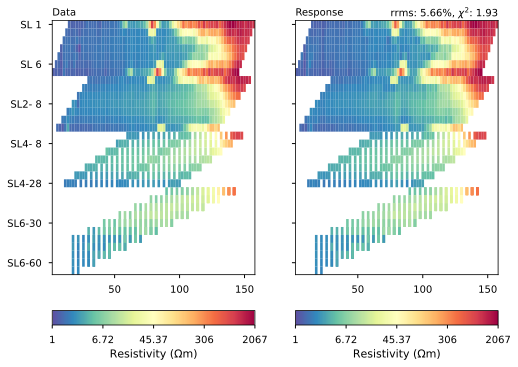

In [11]:
mgr.showFit();

Alternatively, we might look at the misfit distribution to see whether it is uncorrelated Gaussian.

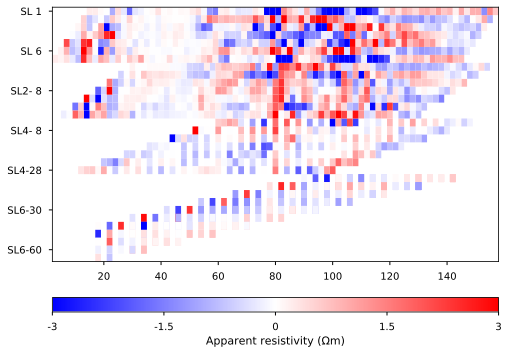

In [12]:
misfit = pg.log(mgr.inv.response / mgr.data["rhoa"]) / data["err"]
pg.show(data, misfit, cMap="bwr", cMin=-3, cMax=3);

A good and simple resolution measure is the coverage, i.e. sum of sensitivities.

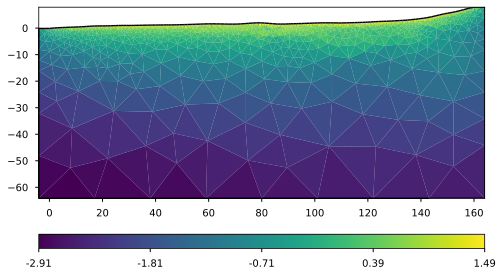

In [17]:
pg.show(mgr.paraDomain, mgr.coverage());

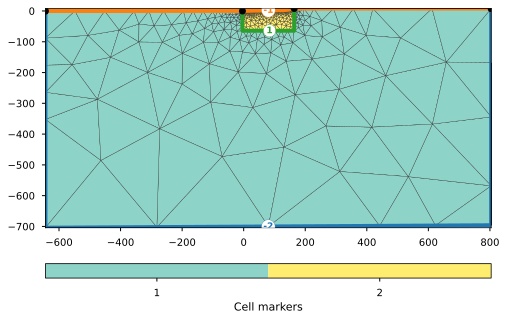

In [18]:
# Let's have a look at the actual mesh behind the inversion
ax, _ = pg.show(mgr.mesh, markers=True, showMesh=True, clipBoundaryMarkers=True);
# ax.set_xlim(-20, 180);
# ax.set_ylim(-40, 5);

Now we want to create our own mesh and include a known structural boundary as prior information.

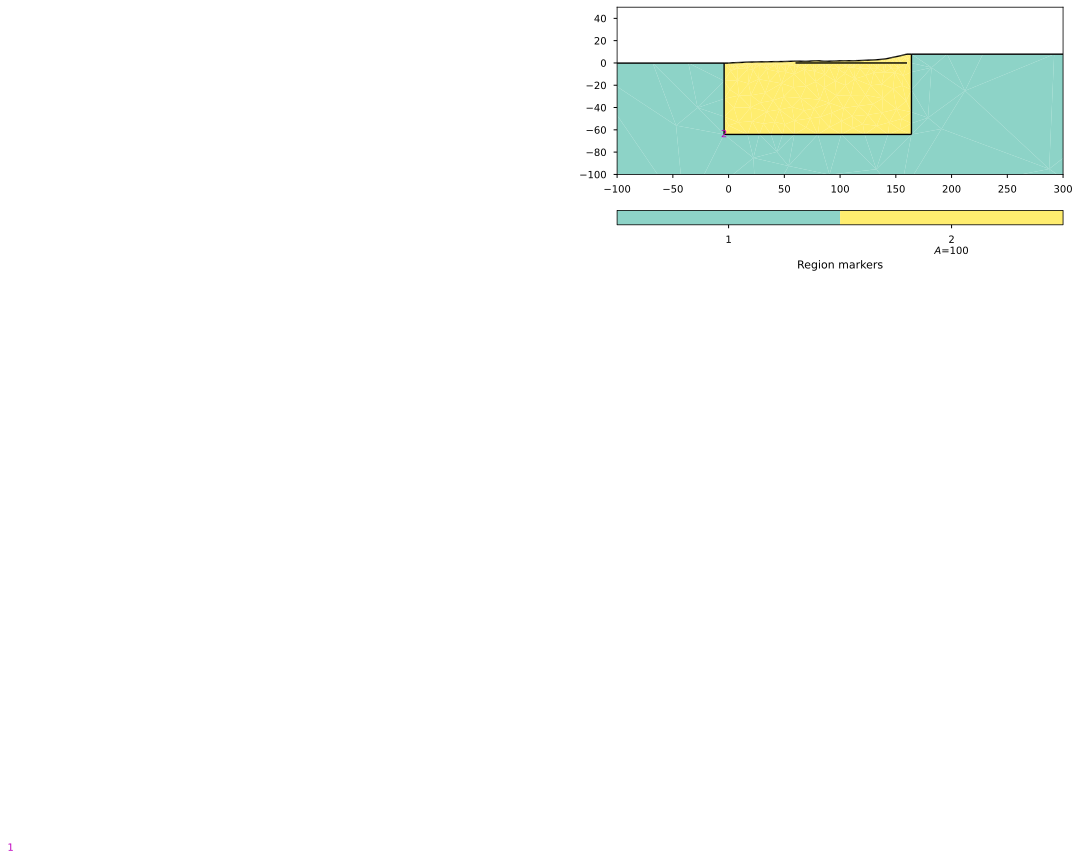

In [29]:
geo = pg.meshtools.createParaMeshPLC(data, paraMaxCellSize=100)
line = pg.meshtools.createLine(start=[60, 0], end=[160, 0], marker=1) # marker>0 means it functions as a constraint
geo += line
ax, _ = pg.show(geo);
ax.set_xlim(-100, 300);
ax.set_ylim(-100, 50);

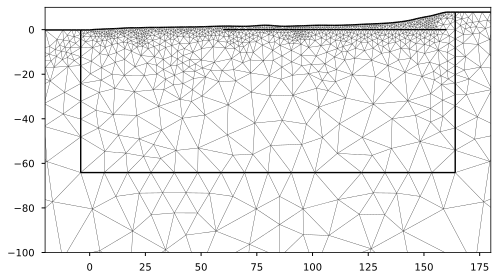

In [30]:
mesh = pg.meshtools.createMesh(geo, quality=34)
ax, _ = pg.show(mesh)
ax.set_ylim(-100, 10)
ax.set_xlim(-20, 180);

In this example we use the [`ert.ERTManager()`](https://www.pygimli.org/pygimliapi/_generated/pygimli.physics.ert.html#pygimli.physics.ert.ERTManager)from the `ert` physics module.

20/03/24 - 15:26:15 - pyGIMLi - INFO - Found 2 regions.
20/03/24 - 15:26:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/03/24 - 15:26:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/03/24 - 15:26:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/03/24 - 15:26:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4842 Cells: 9252 Boundaries: 7154
20/03/24 - 15:26:15 - pyGIMLi - INFO - Use median(data values)=4.107305932589179
20/03/24 - 15:26:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1741, min/max=4.107306/4.107306
20/03/24 - 15:26:15 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000016C5275BD10>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000016C5275BC20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000016C5275BE00>
min/max (data): 1/2067
min/max (error): 3%/13.09%
min/max (start model): 4.11/4.11
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 3759.07
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  257.12 (dPhi = 92.96%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   77.07 (dPhi = 69.31%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.34 (dPhi = 82.93%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.08 (dPhi = 37.53%) lam: 50.0
---------------

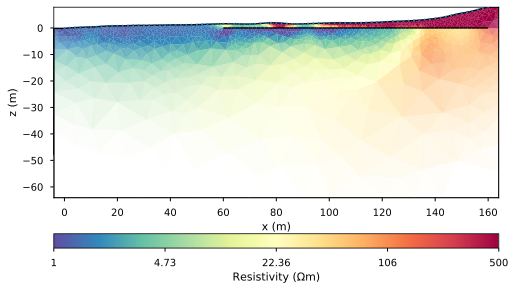

In [31]:
mgrConstrained = ert.ERTManager()
mgrConstrained.invert(data=data, verbose=True, lam=50, mesh=mesh, maxIter=5)
mgrConstrained.showResult(cMin=1, cMax=500, xlabel="x (m)", ylabel="z (m)");